In [6]:
# Add path to Project home dir
basep="/groups/ag-reuter"
import sys
sys.path.append(basep + "/projects/master-theses/henschell")
sys.path.append(basep + "/projects/master-theses/henschell/SuperResSurfer")
sys.path.append(basep + "/projects/DeepSurfer/FastSurfer")
sys.path.append(basep + "/projects/DeepSurfer/FastSurfer/FastSurfer")

In [11]:
from SuperResSurfer.run_validation import RunMetricsData
import argparse
import json
import importlib
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [111]:
datasets_info = {"MCRIB": {"orig": "mri/orig.nii.gz", 
                      "input_img": basep + "/projects/datasets/MCRIB/VINN/P01/mri/orig_t1.nii.gz",
                      "img_id": "P01",
                      "output_dir": basep + "/projects/datasets/MCRIB/VINN",
                          "gt": basep + "/projects/datasets/MCRIB/VINN/P01/mri/parc_gt.nii.gz"},
                 "feta": {"orig": "T2w_orig.mgz", 
                         "input_img": basep + "/projects/datasets/FETA/FastSurfer/sub-001/T2w_orig.nii.gz",
                         "img_id": "sub-001",
                         "output_dir": basep + "/projects/datasets/FETA/FastSurfer",
                         "gt": basep + "/projects/datasets/FETA/FastSurfer/sub-001/dseg_orig.nii.gz"},
                "iseg": {"orig": "-T2.mgz", 
                         "input_img": basep + "/projects/datasets/iseg2019/iSeg-2019-nifti/subject-1-T2.nii.gz",
                         "img_id": "subject-1",
                         "output_dir": basep + "/projects/datasets/iseg2019/iSeg-2019-Training-Predictions",
                         "gt": basep + "/projects/datasets/iseg2019/iSeg-2019-nifti/subject-1-label.mgz"},
                 "ucdavis": {"orig": "T2w_orig.mgz", 
                         "input_img": basep + "/projects/datasets/uc-davis-autism/fs/104317-100/104317-100_OwlOrient.long.104317-100_base/mri/orig.mgz",
                         "img_id": "100604-200",
                         "output_dir": basep + "/projects/datasets/uc-davis-autism/vinn/100604-200",
                         "gt": basep + "/projects/datasets/uc-davis-autism/fs/104317-100/104317-100_OwlOrient.long.104317-100_base/mri/aseg.mgz"}
                }

In [116]:
# Set file to run inference on
# name of the orig image, name of the input image, name of the sid, name of the model
dataset = "iseg"
model_name = "VINN"
basename = "FastSurferVINN_Infant_bigMixAffineNNSynthSegMix_T2_LatentAugPlus_AdamW_Cos_3x3F_71_0.8BR_full"
exp_dir = basep + "/projects/master-theses/henschell/FastInfantSurfer/experiments"

In [117]:
# create config-file
cfg_inf = {            
  "orig_name": datasets_info[dataset]["orig"],
  "tw": datasets_info[dataset]["input_img"],
  "sid": datasets_info[dataset]["img_id"],
  "model_name": model_name,
  "sd": datasets_info[dataset]["output_dir"],
  "batch_size": 1,
  "outdims": 320,  # needs to be set to 320 for 0.5 res inference (default is 256 and images are larger for 0.5mm)
  "base_dim": 320,
  "fs": False,
  "load_pred_from_disk": False,
  "scale_only": False,
  "scale_output": 1.0,
  "membership_interpol": False,
  "lut": basep + "/projects/master-theses/henschell/FastInfantSurfer/configs/FastInfantSurfer_dHCP_full_LUT.tsv",
  "combine": True,
  "cfg_cor": exp_dir + "/config/" + basename + "_coronal/config.yaml",
  "cfg_sag": exp_dir + "/config/" + basename + "_sagittal/config.yaml",
  "cfg_ax": exp_dir + "/config/" + basename + "_axial/config.yaml",
  "ckpt_cor": exp_dir + "/checkpoints/" + basename + "_coronal/Best_training_state.pkl",
  "ckpt_sag": exp_dir + "/checkpoints/" + basename + "_sagittal/Best_training_state.pkl",
  "ckpt_ax": exp_dir + "/checkpoints/" + basename + "_axial/Best_training_state.pkl",
  "base_dim": 256}

In [118]:
#parser = argparse.ArgumentParser(description=__doc__)
#args = parser.parse_args()

# Overwrite with conf-file
#with open(cfg_inf, 'r') as f:
#    parser.set_defaults(**json.load(f))

#parser.set_defaults(**cfg_inf)

eval = RunMetricsData(cfg_inf)

# Set orig, sid and model name
eval.set_orig(cfg_inf["tw"])
eval.set_subject(cfg_inf["sid"])
eval.set_fname_sbj(cfg_inf["sid"], cfg_inf["tw"])
eval.set_modelname(cfg_inf["model_name"])

# Run model
pred_data = eval.get_prediction()

[INFO: eval.py:   28]: Run Inference with config:
[INFO: eval.py:   29]: {'CONFIG_LOG_PATH': '/groups/ag-reuter/projects/master-theses/henschell/FastInfantSurfer/VINNA/config/FastSurferVINN_Infant_bigMixAffineNNSynthSegMix_T2_LatentAugPlus_AdamW_Cos_3x3F_71_0.8BR_full_coronal',
 'DATA': {'AUG': ['SynthSeg',
                  'RAnisotropy',
                  'BiasField',
                  'RGamma',
                  'Noise',
                  'Ghosting',
                  'Blur',
                  'Gaussian'],
          'CLASS_OPTIONS': ['aseg', 'children'],
          'COMBINED_LABELS': True,
          'DIMENSION': 2,
          'IMG_TYPE': 't2_image',
          'LATENT_AFFINE': True,
          'LOCKED_BORDERS': 2,
          'LUT': '/groups/ag-reuter/projects/master-theses/henschell/FastInfantSurfer/configs/FastInfantSurfer_dHCP_full_LUT.tsv',
          'MAX_DISPLACEMENT': (8, 8),
          'META_INFO': '/groups/ag-reuter/projects/master-theses/henschell/FastInfantSurfer/data/dataset_spl

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:05<00:00, 48.27batch/s]

[INFO: eval.py:  154]: Inference on 256 batches for coronal successful
[INFO: eval.py:  179]: Inference on /groups/ag-reuter/projects/datasets/iseg2019/iSeg-2019-nifti/subject-1-T2.nii.gz finished in 5.3078 seconds
[INFO: run_validation.py:  251]: Run sagittal view agg
Running Model FastSurferVINN
[INFO: eval.py:   76]: Loading checkpoint /groups/ag-reuter/projects/master-theses/henschell/FastInfantSurfer/experiments/checkpoints/FastSurferVINN_Infant_bigMixAffineNNSynthSegMix_T2_LatentAugPlus_AdamW_Cos_3x3F_71_0.8BR_full_sagittal/Best_training_state.pkl


[INFO: dataset.py:   35]: Loading Sagittal with input voxelsize (1.0, 1.0)
[INFO: dataset.py:   63]: Successfully loaded Image from /groups/ag-reuter/projects/datasets/iseg2019/iSeg-2019-nifti/subject-1-T2.nii.gz


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:06<00:00, 41.18batch/s]

[INFO: eval.py:  154]: Inference on 256 batches for sagittal successful
[INFO: eval.py:  179]: Inference on /groups/ag-reuter/projects/datasets/iseg2019/iSeg-2019-nifti/subject-1-T2.nii.gz finished in 6.2194 seconds
[INFO: run_validation.py:  251]: Run axial view agg


Running Model FastSurferVINN
[INFO: eval.py:   76]: Loading checkpoint /groups/ag-reuter/projects/master-theses/henschell/FastInfantSurfer/experiments/checkpoints/FastSurferVINN_Infant_bigMixAffineNNSynthSegMix_T2_LatentAugPlus_AdamW_Cos_3x3F_71_0.8BR_full_axial/Best_training_state.pkl
[INFO: dataset.py:   40]: Loading Axial with input voxelsize (1.0, 1.0)
[INFO: dataset.py:   63]: Successfully loaded Image from /groups/ag-reuter/projects/datasets/iseg2019/iSeg-2019-nifti/subject-1-T2.nii.gz


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:05<00:00, 47.49batch/s]

[INFO: eval.py:  154]: Inference on 256 batches for axial successful
[INFO: eval.py:  179]: Inference on /groups/ag-reuter/projects/datasets/iseg2019/iSeg-2019-nifti/subject-1-T2.nii.gz finished in 5.3952 seconds


In [84]:
import pandas as pd
t = pd.read_csv("/groups/ag-reuter/projects/master-theses/henschell/FastInfantSurfer/configs/FastInfantSurfer_dHCP_full_LUT.tsv", sep="\t")

/tmp/ipykernel_399230/1878326341.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  seg_data = np.asanyarray(nib.load(datasets_info[dataset]["gt"]).dataobj).astype(np.int)


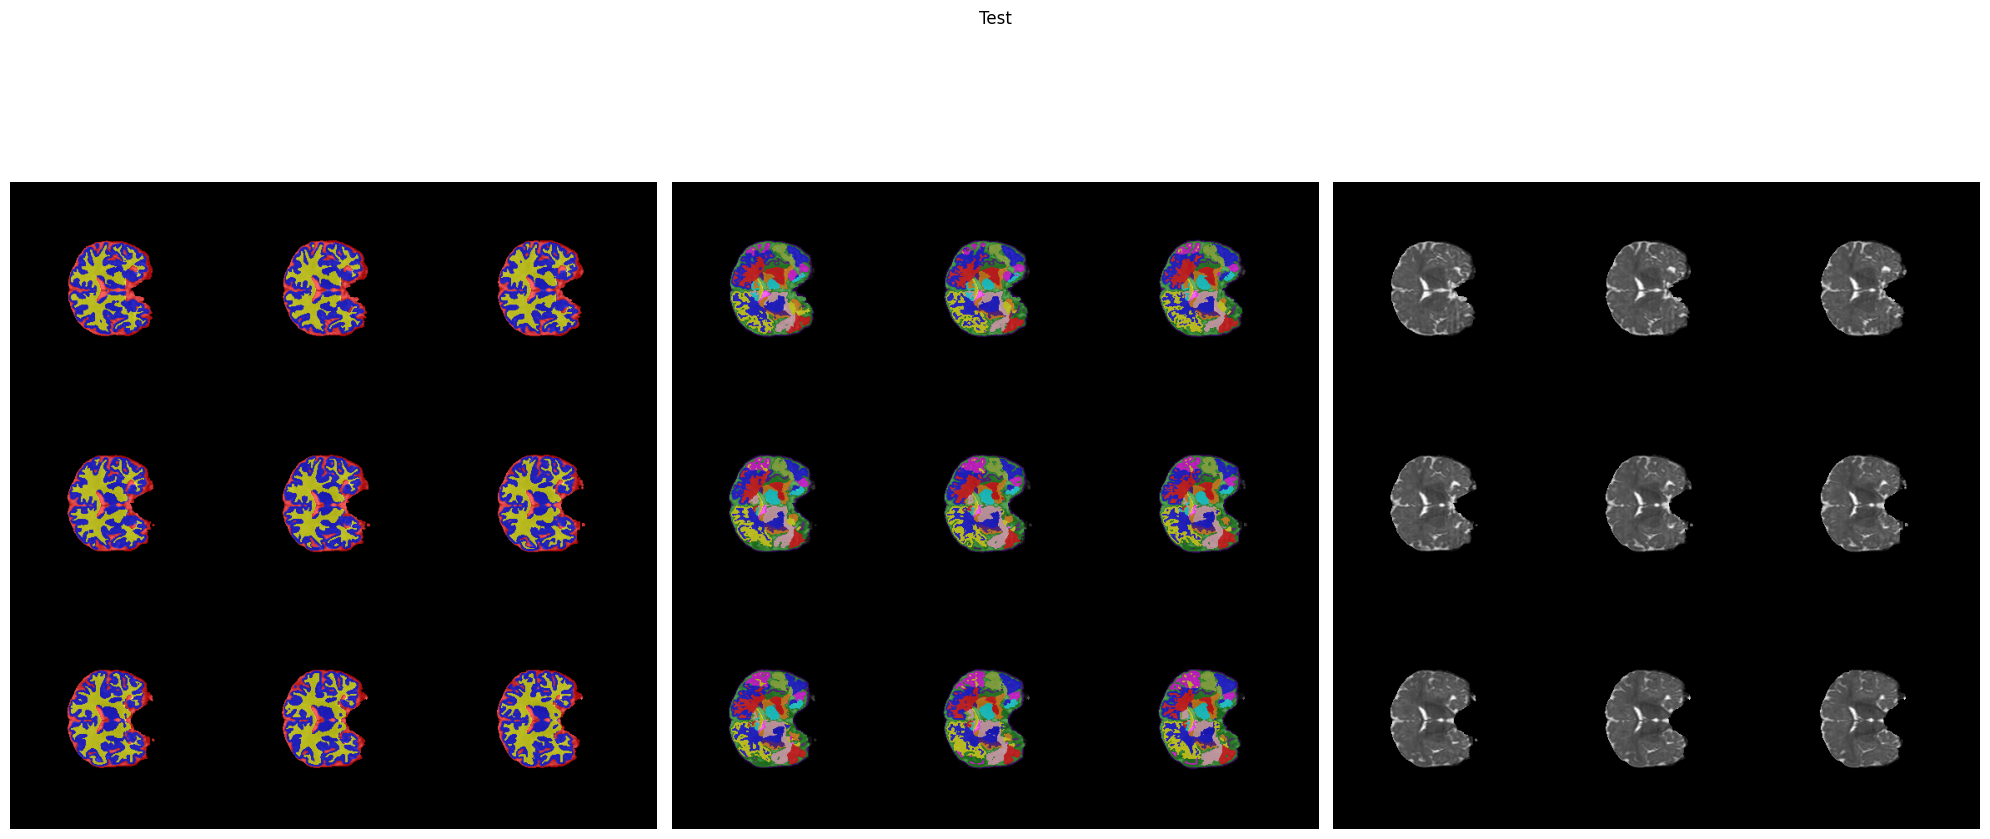

<Figure size 640x480 with 0 Axes>

In [119]:
# Check predictions
import torch
img_data = np.asanyarray(nib.load(datasets_info[dataset]["input_img"]).dataobj)
img_data_batch = np.expand_dims(img_data, axis=(0,1))
torch_img = torch.from_numpy(img_data_batch)

seg_data = np.asanyarray(nib.load(datasets_info[dataset]["gt"]).dataobj).astype(int)
seg_data_batch = np.expand_dims(seg_data, axis=(0))
torch_seg = torch.from_numpy(seg_data_batch)

pred_batch = pred_data.unsqueeze_(0)
from SuperResSurfer.SuperResSegm.utils.misc import plot_predictions

plot_predictions(torch_img, torch_seg, pred_batch, "Test", None, None, "val")